In [90]:
#Book2_PKf resuölts_Valid peaks_Control Camk2a-Cre_NCX1 analysis

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.pipeline import make_pipeline


In [138]:
# Data loading and understanding

In [139]:
df=pd.read_excel('Book2_PKf resuölts_Valid peaks_Control Camk2a-Cre_NCX1.xlsx')

In [140]:
df.shape

(1554, 20)

In [141]:
df.head()

,Unnamed: 0,image_filename,dat_filename,roi_id,roi_pos_x,roi_pos_y,roi_pos_t_start,roi_pos_t_max,roi_pos_t_end,amplitude,snr,mean_increase,mean_decrease,std_slope,time_of_steep_increase,time_of_steep_decrease,duration_peakstart_to_peakmax,time_peakstart_to_half_max,fdhm,is_valid_peak
0,0.0,NaN,Z:\project_stroke\Somayyeh\OPO_Glutamate imagi...,0.0,85.5,97.0,83.0,158.0,233,20.839268,15.623497,0.274803,-0.207890,0.648311,-4.444764,27.870956,6.0,2.0,23.0,1.0
1,1.0,NaN,Z:\project_stroke\Somayyeh\OPO_Glutamate imagi...,0.0,85.5,97.0,469.0,544.0,619,0.542067,0.406395,0.025289,0.002382,0.031582,-46.137898,10.260835,6.0,1.0,NaN,1.0
2,2.0,NaN,Z:\project_stroke\Somayyeh\OPO_Glutamate imagi...,0.0,85.5,97.0,479.0,554.0,629,0.542088,0.406411,0.020064,0.003517,0.030721,-49.168889,22.498161,4.0,-1.0,NaN,1.0
3,3.0,NaN,Z:\project_stroke\Somayyeh\OPO_Glutamate imagi...,0.0,85.5,97.0,493.0,568.0,643,0.716384,0.537083,0.015069,-0.000458,0.029182,-43.669669,87.052864,7.0,-1.0,NaN,1.0
4,4.0,NaN,Z:\project_stroke\Somayyeh\OPO_Glutamate imagi...,0.0,85.5,97.0,509.0,584.0,659,0.947227,0.710150,0.012200,-0.004031,0.028224,-35.539881,18.454543,7.0,-1.0,17.0,1.0


In [142]:
df.columns

Index(['Unnamed: 0', 'image_filename', 'dat_filename', 'roi_id', 'roi_pos_x',
       'roi_pos_y', 'roi_pos_t_start', 'roi_pos_t_max', 'roi_pos_t_end',
       'amplitude', 'snr', 'mean_increase', 'mean_decrease', 'std_slope',
       'time_of_steep_increase', 'time_of_steep_decrease',
       'duration_peakstart_to_peakmax', 'time_peakstart_to_half_max', 'fdhm',
       'is_valid_peak'],
      dtype='object')

In [143]:
# Columns like ['Unnamed: 0', 'image_filename', 'dat_filename'] does not imact on the model so we drop them

In [144]:
df_new=df.drop(['Unnamed: 0', 'image_filename', 'dat_filename'], axis=1)

In [145]:
df_new.head()

,roi_id,roi_pos_x,roi_pos_y,roi_pos_t_start,roi_pos_t_max,roi_pos_t_end,amplitude,snr,mean_increase,mean_decrease,std_slope,time_of_steep_increase,time_of_steep_decrease,duration_peakstart_to_peakmax,time_peakstart_to_half_max,fdhm,is_valid_peak
0,0.0,85.5,97.0,83.0,158.0,233,20.839268,15.623497,0.274803,-0.207890,0.648311,-4.444764,27.870956,6.0,2.0,23.0,1.0
1,0.0,85.5,97.0,469.0,544.0,619,0.542067,0.406395,0.025289,0.002382,0.031582,-46.137898,10.260835,6.0,1.0,NaN,1.0
2,0.0,85.5,97.0,479.0,554.0,629,0.542088,0.406411,0.020064,0.003517,0.030721,-49.168889,22.498161,4.0,-1.0,NaN,1.0
3,0.0,85.5,97.0,493.0,568.0,643,0.716384,0.537083,0.015069,-0.000458,0.029182,-43.669669,87.052864,7.0,-1.0,NaN,1.0
4,0.0,85.5,97.0,509.0,584.0,659,0.947227,0.710150,0.012200,-0.004031,0.028224,-35.539881,18.454543,7.0,-1.0,17.0,1.0


In [146]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   roi_id                         1552 non-null   float64
 1   roi_pos_x                      1552 non-null   float64
 2   roi_pos_y                      1552 non-null   float64
 3   roi_pos_t_start                1552 non-null   float64
 4   roi_pos_t_max                  1552 non-null   float64
 5   roi_pos_t_end                  1553 non-null   object 
 6   amplitude                      1554 non-null   float64
 7   snr                            1553 non-null   float64
 8   mean_increase                  1553 non-null   float64
 9   mean_decrease                  1553 non-null   float64
 10  std_slope                      1553 non-null   float64
 11  time_of_steep_increase         1553 non-null   float64
 12  time_of_steep_decrease         1553 non-null   f

In [147]:
df['roi_pos_t_end'].unique()

array([233, 619, 629, 643, 659, 679, 686, 696, 706, 717, 725, 734, 746,
       756, 767, 769, 771, 1512, 1612, 1617, 1627, 1645, 1665, 1682, 1685,
       1696, 1704, 1712, 1719, 1732, 1734, 1738, 1748, 1764, 1775, 1785,
       1792, 1800, 1814, 1820, 1834, 1846, 1852, 1861, 1869, 1881, 1897,
       1911, 1916, 1925, 1933, 1938, 1956, 1964, 1980, 163, 172, 180, 194,
       205, 213, 216, 219, 235, 267, 275, 286, 560, 578, 592, 606, 613,
       615, 622, 625, 631, 640, 651, 662, 676, 685, 701, 712, 722, 735,
       747, 760, 774, 779, 795, 797, 806, 812, 823, 840, 849, 855, 865,
       1843, 1892, 1900, 1915, 1922, 1931, 1941, 1976, 232, 1397, 1428,
       1438, 1440, 1444, 1452, 1456, 1459, 1465, 1474, 1480, 1482, 1492,
       1498, 1513, 1530, 1544, 1553, 1560, 1563, 1570, 1573, 1580, 1590,
       1605, 1619, 1628, 1634, 1646, 1658, 1667, 1675, 1679, 1686, 1697,
       1699, 1713, 1720, 1726, 1745, 1761, 1770, 1778, 1784, 1813, 1826,
       1835, 1860, 1871, 1885, 1891, 1899, 1912, 192

In [148]:
df_new['roi_pos_t_end']=df_new['roi_pos_t_end'].replace('devided to 3',np.nan)

/tmp/ipykernel_33795/514889268.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new['roi_pos_t_end']=df_new['roi_pos_t_end'].replace('devided to 3',np.nan)


In [149]:
df_new['roi_pos_t_end'].unique()

array([ 233.,  619.,  629.,  643.,  659.,  679.,  686.,  696.,  706.,
        717.,  725.,  734.,  746.,  756.,  767.,  769.,  771., 1512.,
       1612., 1617., 1627., 1645., 1665., 1682., 1685., 1696., 1704.,
       1712., 1719., 1732., 1734., 1738., 1748., 1764., 1775., 1785.,
       1792., 1800., 1814., 1820., 1834., 1846., 1852., 1861., 1869.,
       1881., 1897., 1911., 1916., 1925., 1933., 1938., 1956., 1964.,
       1980.,  163.,  172.,  180.,  194.,  205.,  213.,  216.,  219.,
        235.,  267.,  275.,  286.,  560.,  578.,  592.,  606.,  613.,
        615.,  622.,  625.,  631.,  640.,  651.,  662.,  676.,  685.,
        701.,  712.,  722.,  735.,  747.,  760.,  774.,  779.,  795.,
        797.,  806.,  812.,  823.,  840.,  849.,  855.,  865., 1843.,
       1892., 1900., 1915., 1922., 1931., 1941., 1976.,  232., 1397.,
       1428., 1438., 1440., 1444., 1452., 1456., 1459., 1465., 1474.,
       1480., 1482., 1492., 1498., 1513., 1530., 1544., 1553., 1560.,
       1563., 1570.,

In [150]:
for i in df_new.columns:
    print(df_new[i].isnull().sum())

2
2
2
2
2
2
0
1
1
1
1
1
1
1
1
1273
1


In [151]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   roi_id                         1552 non-null   float64
 1   roi_pos_x                      1552 non-null   float64
 2   roi_pos_y                      1552 non-null   float64
 3   roi_pos_t_start                1552 non-null   float64
 4   roi_pos_t_max                  1552 non-null   float64
 5   roi_pos_t_end                  1552 non-null   float64
 6   amplitude                      1554 non-null   float64
 7   snr                            1553 non-null   float64
 8   mean_increase                  1553 non-null   float64
 9   mean_decrease                  1553 non-null   float64
 10  std_slope                      1553 non-null   float64
 11  time_of_steep_increase         1553 non-null   float64
 12  time_of_steep_decrease         1553 non-null   f

In [152]:
df_new.isnull().sum()

roi_id                              2
roi_pos_x                           2
roi_pos_y                           2
roi_pos_t_start                     2
roi_pos_t_max                       2
roi_pos_t_end                       2
amplitude                           0
snr                                 1
mean_increase                       1
mean_decrease                       1
std_slope                           1
time_of_steep_increase              1
time_of_steep_decrease              1
duration_peakstart_to_peakmax       1
time_peakstart_to_half_max          1
fdhm                             1273
is_valid_peak                       1
dtype: int64

In [153]:
df_new = df_new.apply(lambda col: col.fillna(col.mode()[0]) if not col.mode().empty else col)

In [154]:
df_new.isnull().sum()

roi_id                           0
roi_pos_x                        0
roi_pos_y                        0
roi_pos_t_start                  0
roi_pos_t_max                    0
roi_pos_t_end                    0
amplitude                        0
snr                              0
mean_increase                    0
mean_decrease                    0
std_slope                        0
time_of_steep_increase           0
time_of_steep_decrease           0
duration_peakstart_to_peakmax    0
time_peakstart_to_half_max       0
fdhm                             0
is_valid_peak                    0
dtype: int64

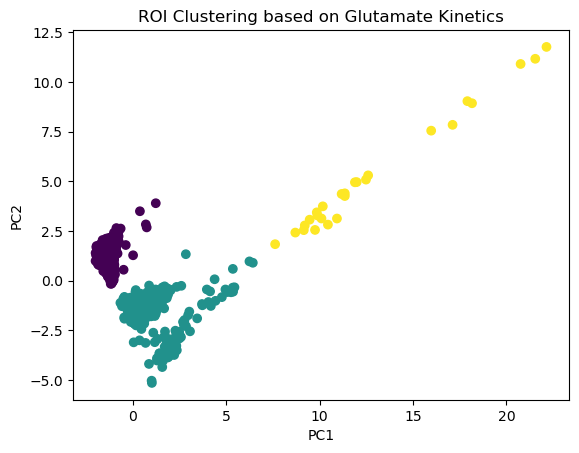

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Features to use
#features = ['amplitude', 'fdhm', 'duration_peakstart_to_peakmax', 'std_slope', 'mean_increase', 'mean_decrease']
X = df_new

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cluster
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_pca)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('ROI Clustering based on Glutamate Kinetics')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

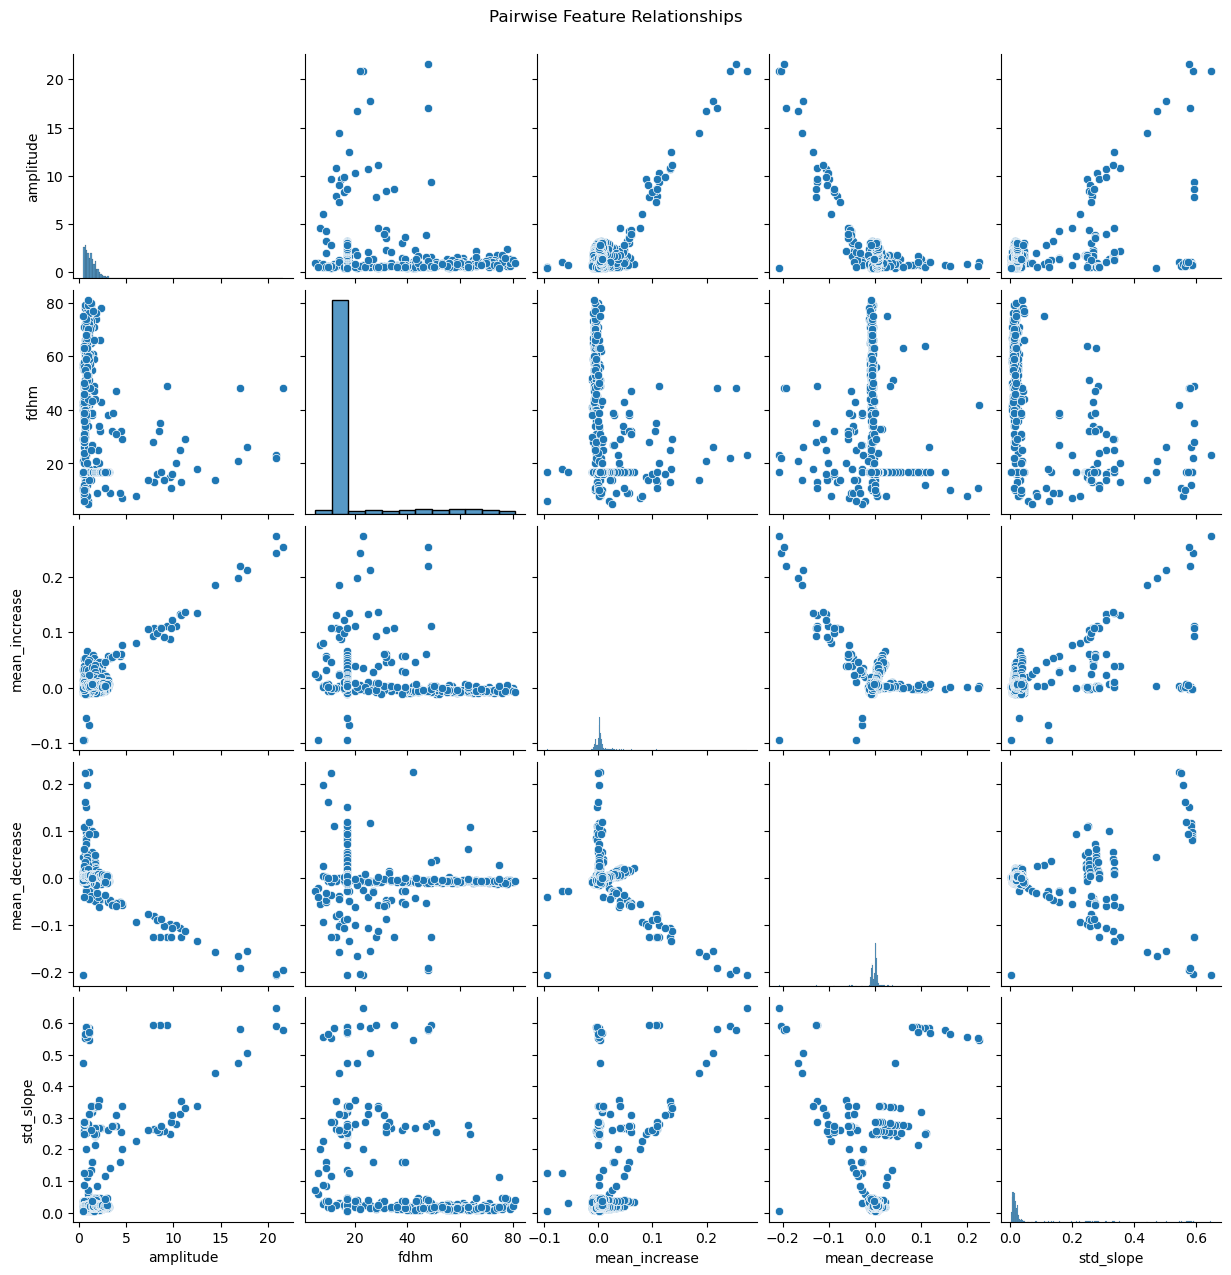

In [156]:
# Character rize ROI behavior
features = ['amplitude', 'fdhm', 'mean_increase', 'mean_decrease', 'std_slope']
sns.pairplot(df_new[features])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

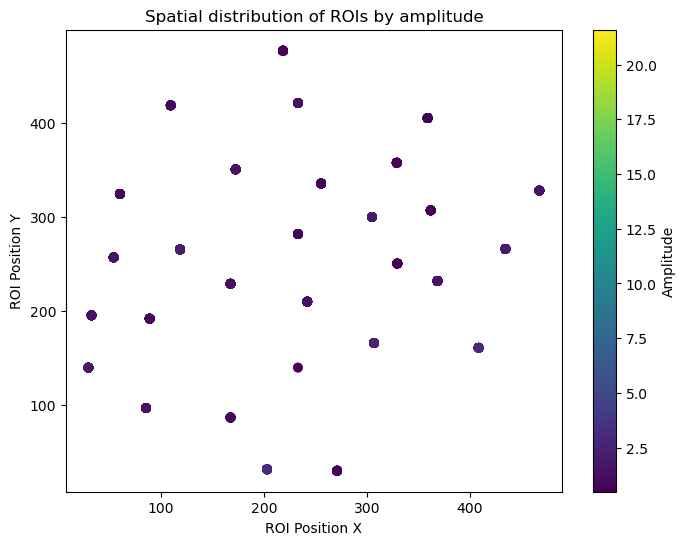

In [158]:
# Spatial map of ROI
plt.figure(figsize=(8, 6))
sc = plt.scatter(df_new['roi_pos_x'], df_new['roi_pos_y'], c=df['amplitude'], cmap='viridis')
plt.colorbar(sc, label='Amplitude')
plt.title("Spatial distribution of ROIs by amplitude")
plt.xlabel("ROI Position X")
plt.ylabel("ROI Position Y")
plt.show()

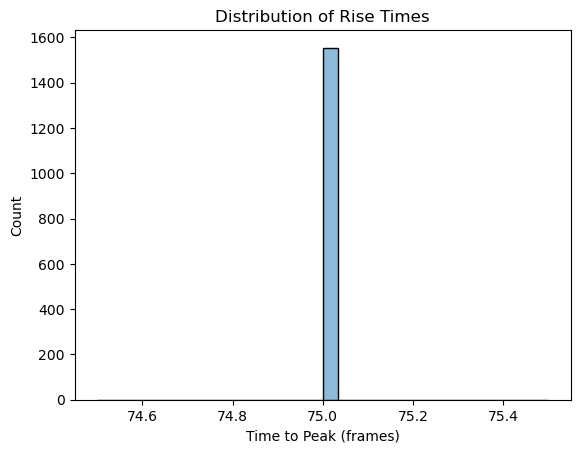

In [159]:
# Signal timimg dynamics
df_new['rise_time'] = df_new['roi_pos_t_max'] - df_new['roi_pos_t_start']
sns.histplot(df_new['rise_time'], bins=30, kde=True)
plt.title("Distribution of Rise Times")
plt.xlabel("Time to Peak (frames)")
plt.show()

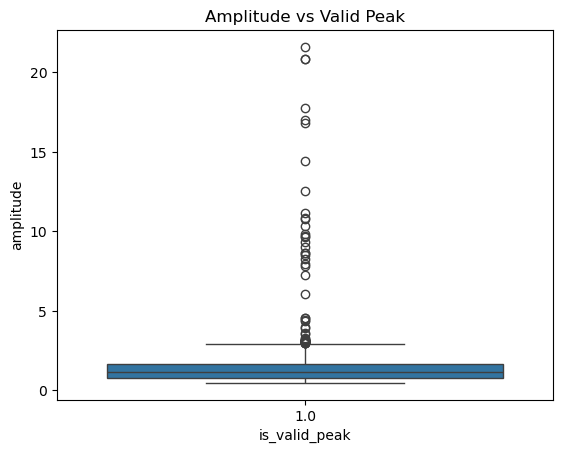

In [160]:
# Amplitude vs validity
sns.boxplot(x='is_valid_peak', y='amplitude', data=df_new)
plt.title("Amplitude vs Valid Peak")
plt.show()

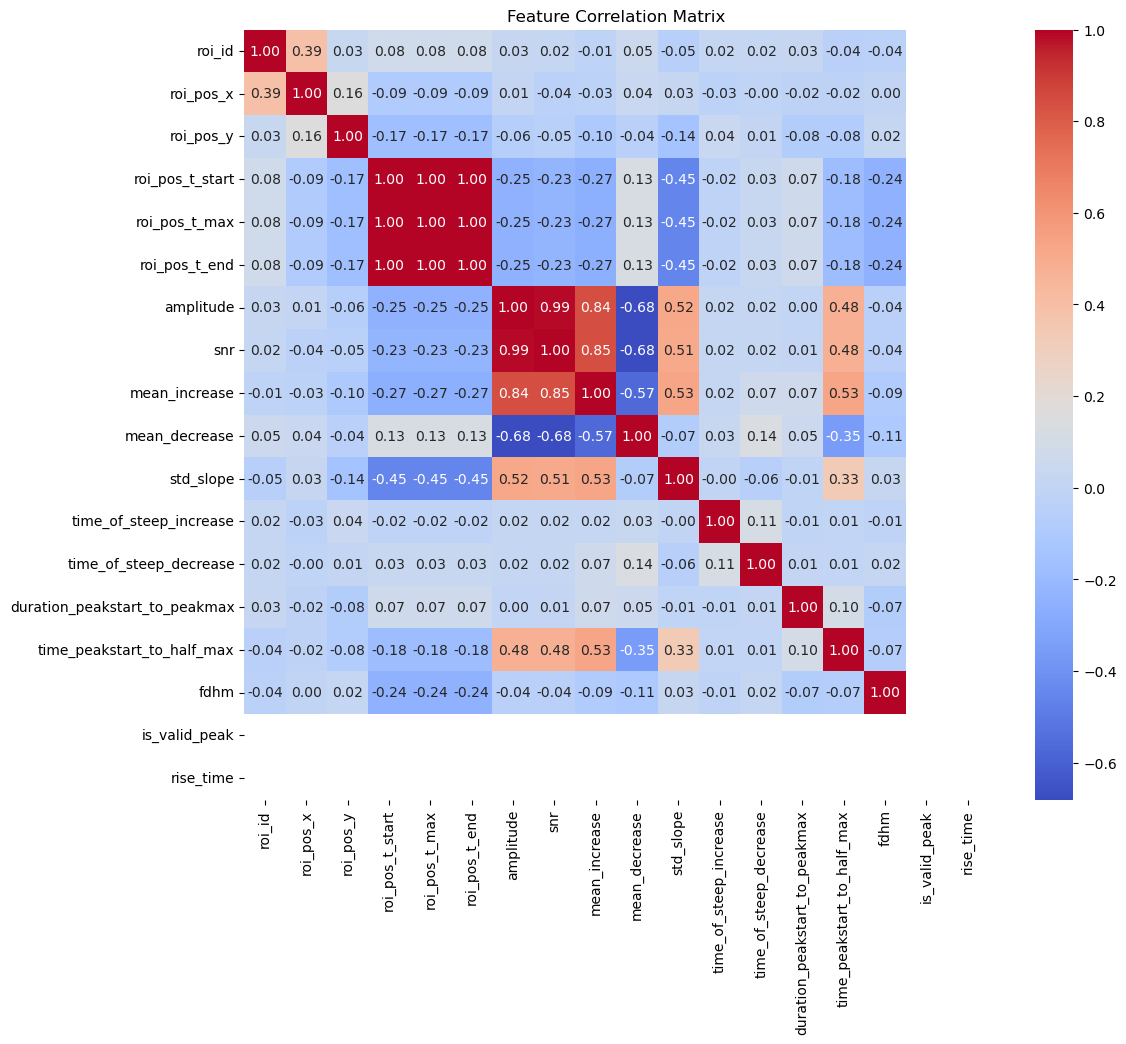

In [161]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_new.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

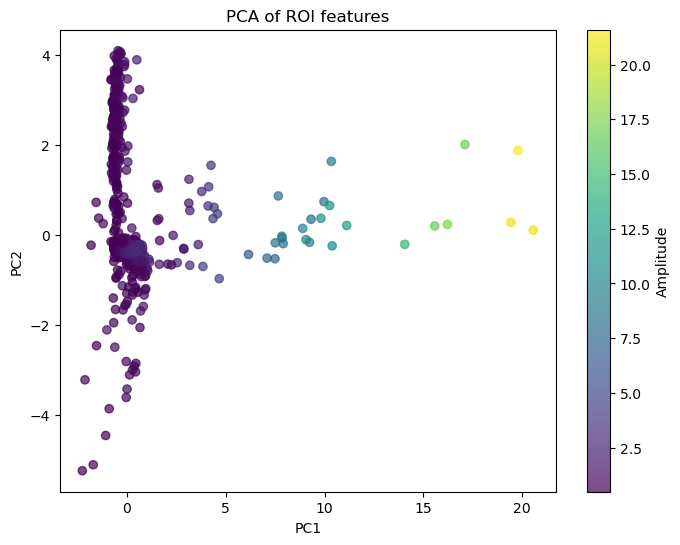

In [162]:
#PCA for dimnetionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_new[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['amplitude'], cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of ROI features')
plt.colorbar(label='Amplitude')
plt.show()


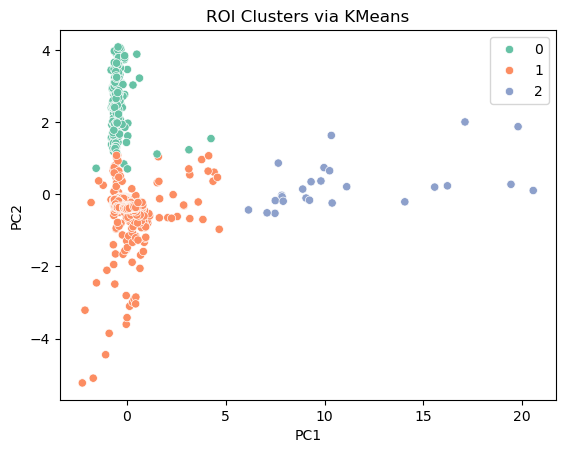

In [163]:
# Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_new['cluster'] = clusters

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("ROI Clusters via KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [164]:
# Predict valid pick uisng ML
clf = RandomForestClassifier(random_state=42)
X = df_new[features]
y = df_new['is_valid_peak']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       311

    accuracy                           1.00       311
   macro avg       1.00      1.00      1.00       311
weighted avg       1.00      1.00      1.00       311



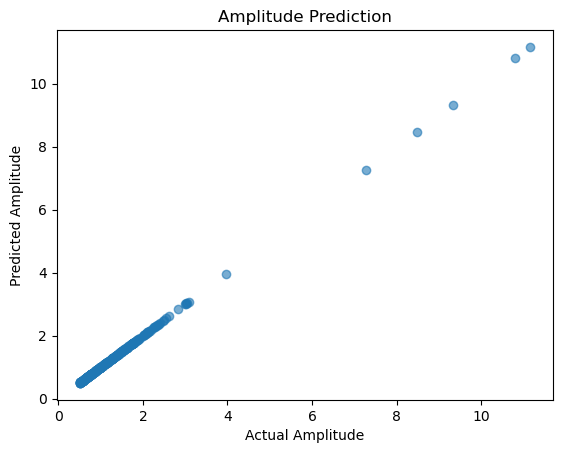

In [165]:
# Predtic amplitude using regression
reg = LinearRegression()
reg.fit(X_train, df_new.loc[X_train.index, 'amplitude'])

preds = reg.predict(X_test)
plt.scatter(df_new.loc[X_test.index, 'amplitude'], preds, alpha=0.6)
plt.xlabel("Actual Amplitude")
plt.ylabel("Predicted Amplitude")
plt.title("Amplitude Prediction")
plt.show()

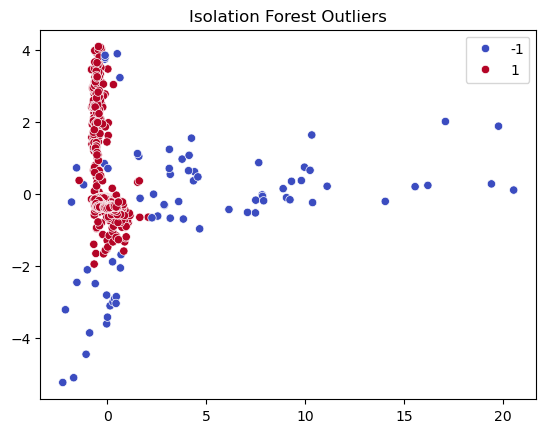

In [166]:
# Outlier detection
iso = IsolationForest(contamination=0.05)
outliers = iso.fit_predict(X_scaled)
df_new['outlier'] = outliers

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=outliers, palette='coolwarm')
plt.title("Isolation Forest Outliers")
plt.show()

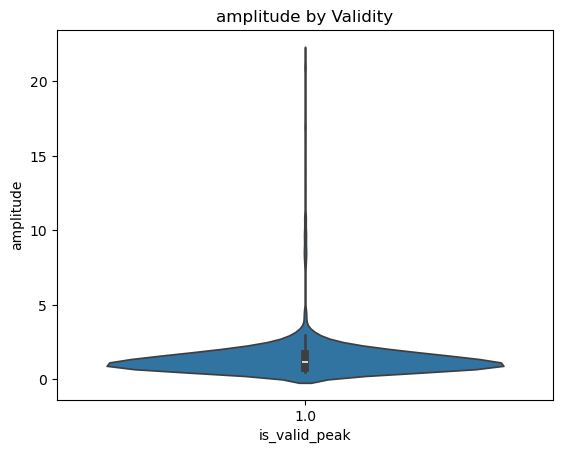

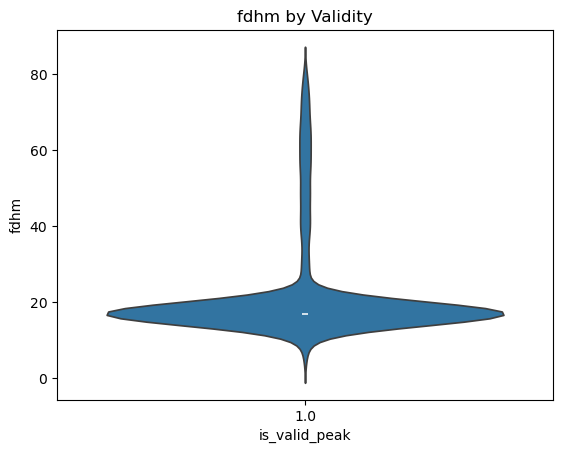

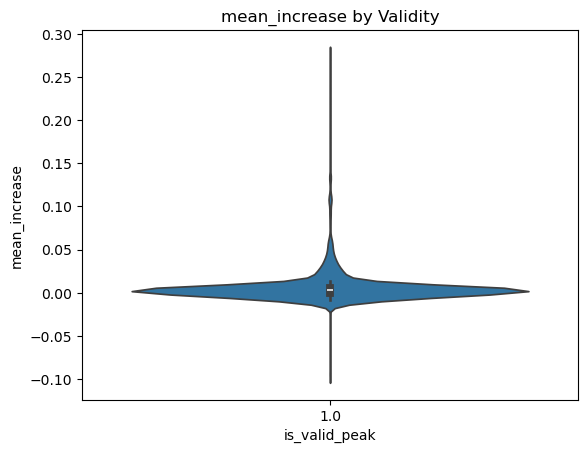

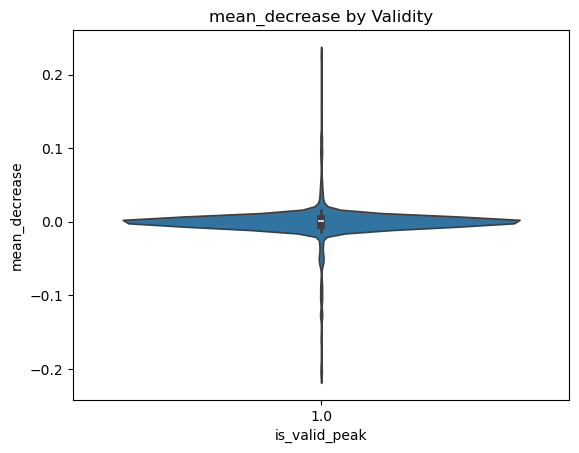

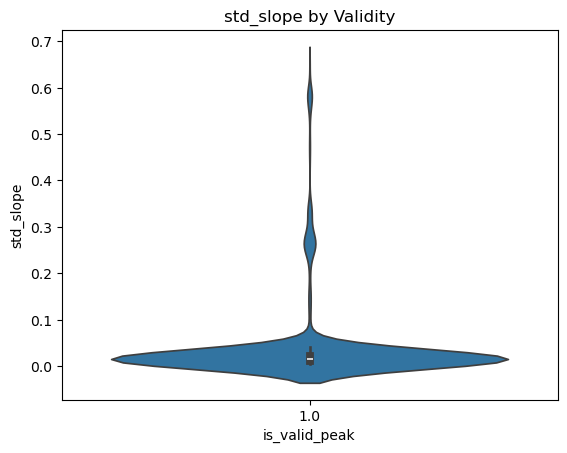

In [167]:
# compare valid vs invalid pick
for feature in features:
    sns.violinplot(x='is_valid_peak', y=feature, data=df_new)
    plt.title(f"{feature} by Validity")
    plt.show()

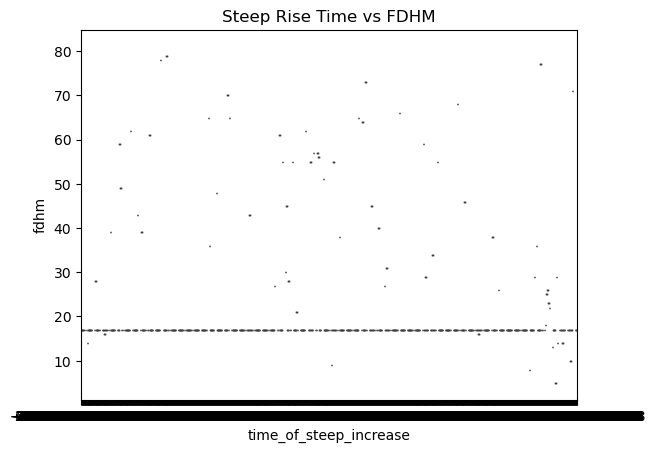

Correlation between steep rise and FDHM: -0.14


In [168]:
# Hypothesis testing
sns.boxplot(x='time_of_steep_increase', y='fdhm', data=df_new)
plt.title("Steep Rise Time vs FDHM")
plt.show()

corr_val = df_new['time_of_steep_increase'].corr(df['fdhm'])
print(f"Correlation between steep rise and FDHM: {corr_val:.2f}")

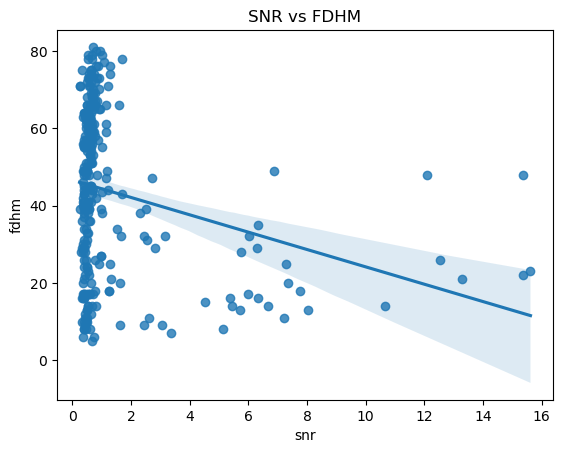

Slope (SNR to FDHM): -0.5101


In [171]:
sns.regplot(x='snr', y='fdhm', data=df)
plt.title("SNR vs FDHM")
plt.show()

reg2 = LinearRegression()
reg2.fit(df_new[['snr']], df_new['fdhm'])
print(f"Slope (SNR to FDHM): {reg2.coef_[0]:.4f}")

In [170]:
df_new.columns

Index(['roi_id', 'roi_pos_x', 'roi_pos_y', 'roi_pos_t_start', 'roi_pos_t_max',
       'roi_pos_t_end', 'amplitude', 'snr', 'mean_increase', 'mean_decrease',
       'std_slope', 'time_of_steep_increase', 'time_of_steep_decrease',
       'duration_peakstart_to_peakmax', 'time_peakstart_to_half_max', 'fdhm',
       'is_valid_peak', 'rise_time', 'cluster', 'outlier'],
      dtype='object')

In [172]:
df_new['duration'] = df['roi_pos_t_end'] - df['roi_pos_t_start']

In [173]:
df_new = df_new.apply(lambda col: col.fillna(col.mode()[0]) if not col.mode().empty else col)

/tmp/ipykernel_33795/381820266.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_new = df_new.apply(lambda col: col.fillna(col.mode()[0]) if not col.mode().empty else col)


In [174]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   roi_id                         1554 non-null   float64
 1   roi_pos_x                      1554 non-null   float64
 2   roi_pos_y                      1554 non-null   float64
 3   roi_pos_t_start                1554 non-null   float64
 4   roi_pos_t_max                  1554 non-null   float64
 5   roi_pos_t_end                  1554 non-null   float64
 6   amplitude                      1554 non-null   float64
 7   snr                            1554 non-null   float64
 8   mean_increase                  1554 non-null   float64
 9   mean_decrease                  1554 non-null   float64
 10  std_slope                      1554 non-null   float64
 11  time_of_steep_increase         1554 non-null   float64
 12  time_of_steep_decrease         1554 non-null   f

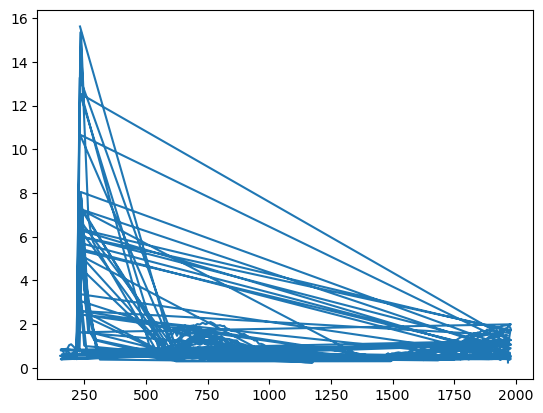

In [175]:
plt.plot(df_new['roi_pos_t_end'],df_new['snr'])

<Axes: xlabel='log_amplitude', ylabel='Count'>

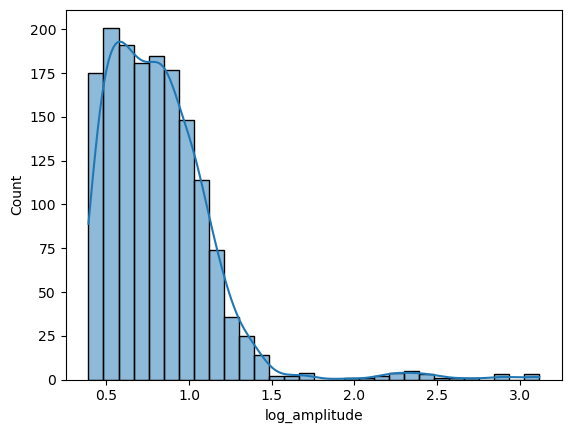

In [176]:
import numpy as np
df_new['log_amplitude'] = np.log1p(df_new['amplitude'])
sns.histplot(df_new['log_amplitude'], bins=30, kde=True)

<Axes: xlabel='amplitude', ylabel='Count'>

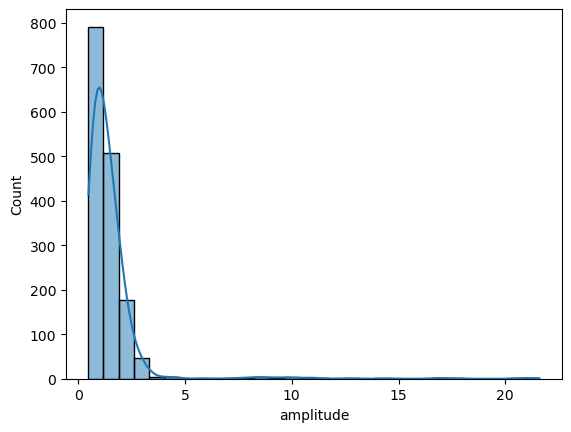

In [177]:
sns.histplot(df_new['amplitude'], bins=30, kde=True)

<Axes: xlabel='rise_time'>

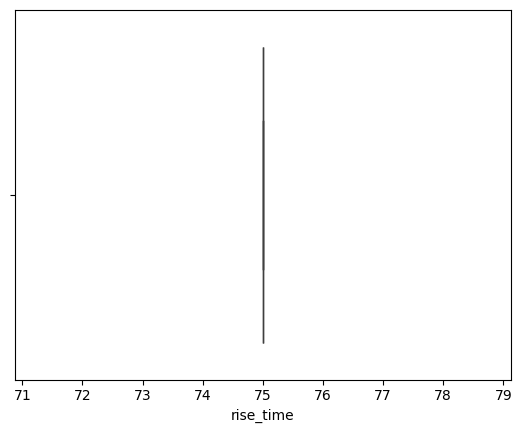

In [178]:
sns.boxplot(x=df_new['rise_time'])

Text(0.5, 1.0, 'Amplitude by Peak Validity')

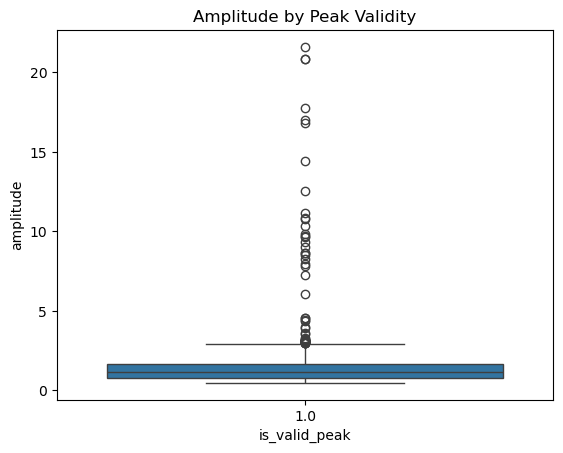

In [179]:
# Count of valid vs invalid peaks
df_new['is_valid_peak'].value_counts(normalize=True)

# Compare features between valid and invalid peaks
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='is_valid_peak', y='amplitude', data=df_new)
plt.title("Amplitude by Peak Validity")

Text(0.5, 1.0, 'Full Duration at Half Maximum (FDHM)')

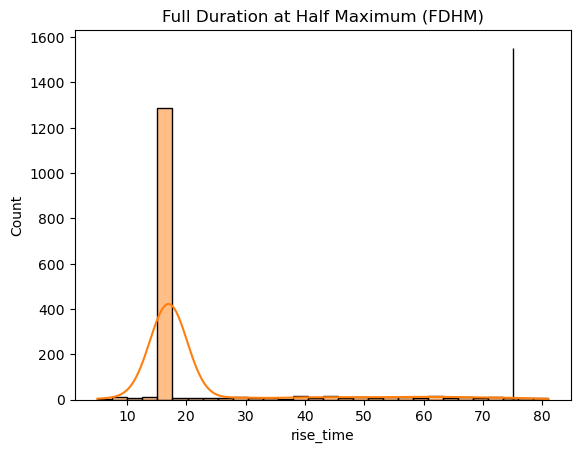

In [180]:
# Distribution of rise time and FDHM
sns.histplot(df_new['rise_time'], kde=True, bins=30)
plt.title("Rise Time Distribution")

sns.histplot(df_new['fdhm'], kde=True, bins=30)
plt.title("Full Duration at Half Maximum (FDHM)")

Text(0.5, 1.0, 'Amplitude vs SNR')

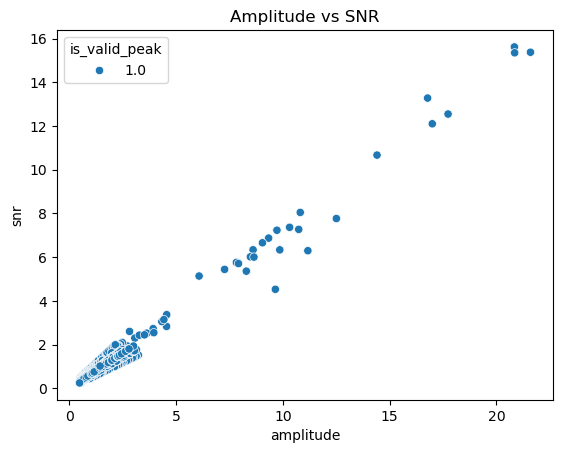

In [181]:
sns.scatterplot(x='amplitude', y='snr', hue='is_valid_peak', data=df_new)
plt.title("Amplitude vs SNR")


Text(0.5, 1.0, 'Spatial Distribution of ROI Amplitudes')

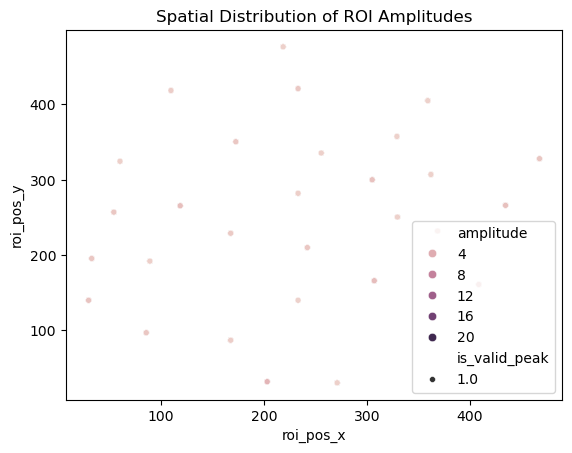

In [182]:
# Scatter plot of ROI positions, color-coded by amplitude
sns.scatterplot(x='roi_pos_x', y='roi_pos_y', hue='amplitude', size='is_valid_peak', data=df_new)
plt.title("Spatial Distribution of ROI Amplitudes")

In [183]:
import statsmodels.api as sm

# Prepare X and y
X = df_new['amplitude']
y = df_new['snr']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    snr   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 6.009e+04
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:11:59   Log-Likelihood:                 483.78
No. Observations:                1554   AIC:                            -963.6
Df Residuals:                    1552   BIC:                            -952.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.006      0.656      0.5

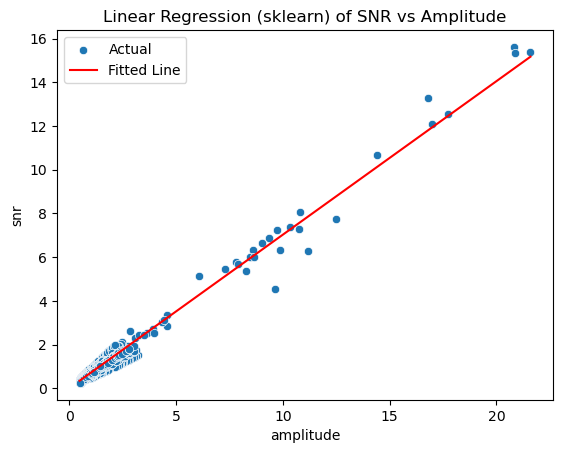

In [184]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df_new[['amplitude']]  # Feature must be 2D
y = df_new['snr']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
df_new['snr_predicted'] = model.predict(X)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='amplitude', y='snr', data=df_new, label='Actual')
sns.lineplot(x='amplitude', y='snr_predicted', data=df_new, color='red', label='Fitted Line')
plt.title("Linear Regression (sklearn) of SNR vs Amplitude")
plt.legend()
plt.show()

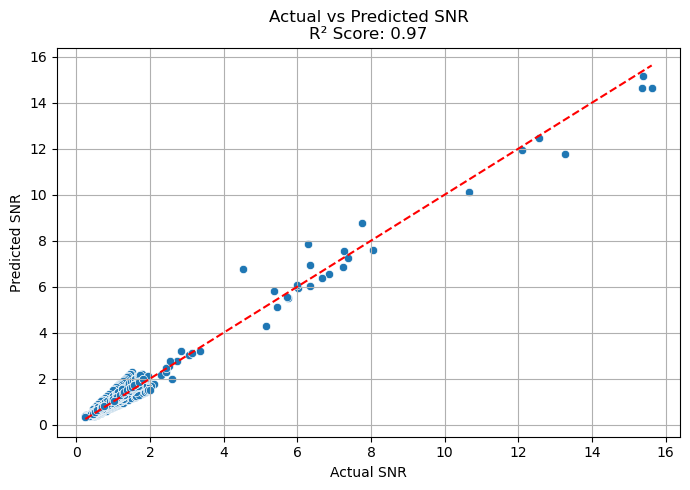

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
X = df_new[['amplitude', 'rise_time', 'fdhm']]
y = df_new['snr']

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Add to DataFrame for plotting
df_new['snr_predicted'] = y_pred

# Plot actual vs predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual SNR")
plt.ylabel("Predicted SNR")
plt.title(f"Actual vs Predicted SNR\nR² Score: {r2_score(y, y_pred):.2f}")
plt.grid(True)
plt.tight_layout()
plt.show()

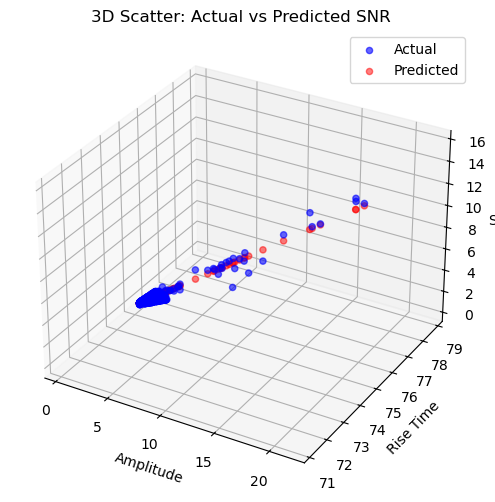

In [186]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_new['amplitude'], df_new['rise_time'], y, c='b', label='Actual', alpha=0.6)
ax.scatter(df_new['amplitude'], df_new['rise_time'], y_pred, c='r', label='Predicted', alpha=0.5)

ax.set_xlabel('Amplitude')
ax.set_ylabel('Rise Time')
ax.set_zlabel('SNR')
ax.set_title("3D Scatter: Actual vs Predicted SNR")
ax.legend()
plt.show()

In [187]:
print("Intercept:", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Intercept: 0.003143225281847739
amplitude: 0.7027
rise_time: 0.0000
fdhm: 0.0000


In [190]:
import joblib

# Save the model
joblib.dump(model, 'snr_regression_model.pkl')

# Load it later
loaded_model = joblib.load('snr_regression_model.pkl')
y_loaded_pred = loaded_model.predict(X)